Дан интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Нужно выявить определяющие успешность игры закономерности. 

Для этого обработаем данные, произведем исследовательский анализ данных и проверим гипотезы.

**Описание данных:**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Обработаем данные:**

Преобразуем столбцы Name, Platform и Genre к нижнему регистру

In [3]:
df['Name'] = df['Name'].str.lower()
df['Platform'] = df['Platform'].str.lower()
df['Genre'] = df['Genre'].str.lower()
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df['Critic_Score'].unique() # оценки критиков рассчитываются по 100-бальной шкале

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [6]:
df['User_Score'].unique() # оценки критиков рассчитываются по 10-бальной шкале

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
df.duplicated().sum() #дубликаты отсутствуют

0

Обработаем пропуски

In [8]:
df['Name'].isna().sum() #есть 2 пропущенных значения

2

Удалим эти значения, так как клиента не интересуют игры, у которых не указано название

In [9]:
df.dropna(subset = ['Name'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df['Platform'].unique() #нет пропущенных значений

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Существует реальный пользовательский рейтинг 0. Могут смешаться пропуски и оценки 0, если заполнять нулями. Поэтому значения NaN в рейтингах заменять не будем

In [11]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В столбцах продаж не будем заменять значения NaN, так как они, скорее всего, не равны нулю. Также они независимы между собой, чтобы заменять их на медиану или среднее

Пропуски в столбцах могли появится из-за некачественного заполнения или из-за того, что компания-производитль не предоставила данную информацию

In [13]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**В столбце Rating много пропусков и они не случайны, скорее всего эти игры не получили оценок, поскольку могли быть выпущены до того как появилась система ESRB или просто еще не успели их оценить. Заменим их на значение "unknown"**

In [14]:
df['Rating'] = df['Rating'].fillna('unknown')

In [15]:
df['Rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Посмотрим на строки, в которых рейтинг пользователей равен tbd

In [16]:
df.query('User_Score=="tbd"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,zumba fitness,wii,2010.0,sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,ps2,2005.0,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,zumba fitness 2,wii,2011.0,sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,udraw studio,wii,2010.0,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001.0,action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,bust-a-move 3000,gc,2003.0,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,mega brain boost,ds,2008.0,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,plushees,ds,2008.0,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


tbd означае, что рейтинг пользователей готовится к выходу. Но он еще не вышел, поэтому заменим значения такого вида на NaN

In [17]:
df.loc[df['User_Score'] == 'tbd','User_Score'] = np.nan # проставим np.nan

In [18]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Проверим типы столбцов

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       7590 non-null   object 
 10  Rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [20]:
df['User_Score'] = df['User_Score'].astype('float64') # преобразуем оценку пользователей к натуральным числам

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       7590 non-null   float64
 10  Rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:**

In [22]:
df['total_sales'] = df[['NA_sales','EU_sales','JP_sales']].sum(axis = 1)
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,39.47
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,30.38
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,29.68
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,26.08
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,27.84


**Проведем исследовательский анализ данных**

*1. Посмотрим, сколько игр выпускалось в разные годы.*

In [23]:
df.groupby('Year_of_Release')['Name'].count()

Year_of_Release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: Name, dtype: int64

Text(0, 0.5, 'Количество игр')

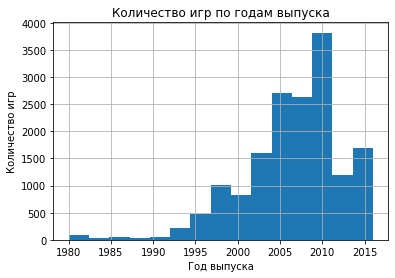

In [24]:
df.hist('Year_of_Release', bins = 15)
plt.title('Количество игр по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

Видно, что был резкий скачёк в выпуске игр в ~2010 годах. До 1992 года выпускалось сравнительно очень небольшое количество игр, поэтому основная работа по анализу будет производиться с играми, выпущенными после 1992 года

*2. Посмотрим, как менялись продажи по платформам. Построим сводную таблицу*

In [25]:
a = df.pivot_table(index = 'Platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
print(a)

          total_sales
Platform             
ps2           1062.33
x360           885.66
wii            828.44
ps3            803.97
ds             746.86
ps             689.95
gba            310.12
ps4            265.79
psp            252.63
xb             249.02
gb             247.26
nes            245.74
3ds            245.64
pc             237.14
n64            214.30
snes           196.82
gc             193.75
xone           145.05
2600            96.07
wiiu            76.24
psv             47.61
sat             33.52
gen             29.80
dc              15.68
scd              1.81
ng               1.44
ws               1.42
tg16             0.16
3do              0.10
gg               0.04
pcfx             0.03


Выберем платформы с наибольшими суммарными продажами и построим распределение по годам

In [26]:
print(a.head(6))

          total_sales
Platform             
ps2           1062.33
x360           885.66
wii            828.44
ps3            803.97
ds             746.86
ps             689.95


Text(0, 0.5, 'Год выпуска')

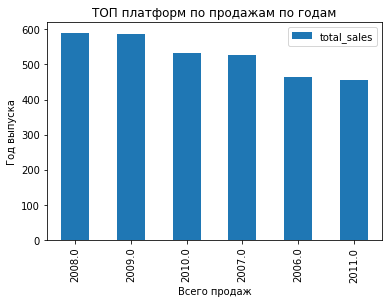

In [27]:
df.groupby(by='Year_of_Release').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(6).plot(kind='bar')
plt.title('ТОП платформ по продажам по годам')
plt.xlabel('Всего продаж')
plt.ylabel('Год выпуска')

В 2006 - 2011 годах пользователи покупали больше всего игр. 

*3. Будем считать, что пик продаж происходил в 2009 году, а далее продажи пошли на спад. Однако по графику выше видно, что с 2013 года опять начался рост продаж. Поэтому актуальнй период - это 2013 - 2016 год*

В дальнейшем анализе не будем учитывать данные за предыдущие годы

*4. Выберем лидирующие по продажам платформы, посмотрим, растут ли в актуальный период продажи или падают*

Выведем лидирующие по продажам платформы за актуальный период

In [28]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]') #срез данных за актуальный период

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,total_sales
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,12.25
33,pokemon x/pokemon y,3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,13.82
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,aiyoku no eustia,psv,2014.0,misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [29]:
a = df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)

Text(0, 0.5, 'Продажи')

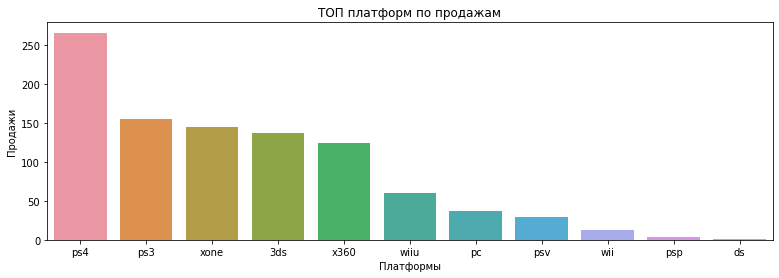

In [30]:
plt.figure(figsize = (13,4))
sns.barplot(x = a.index, y = a['total_sales'])
plt.title('ТОП платформ по продажам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')

Топ продаж по платформам за период 2013-2016

In [31]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head()

,total_sales
Platform,
ps4,265.79
ps3,154.66
xone,145.05
3ds,136.97
x360,124.69


Проверим, растут они или падают

In [32]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "ps4"').pivot_table(index = 'Year_of_Release', 
                                                                                        values = 'total_sales', aggfunc = 'sum').sort_values(by = 'Year_of_Release', ascending = False)

,total_sales
Year_of_Release,
2016.0,59.01
2015.0,100.44
2014.0,84.22
2013.0,22.12


In [33]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "ps3"').pivot_table(index = 'Year_of_Release', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'Year_of_Release', ascending = False)

,total_sales
Year_of_Release,
2016.0,3.23
2015.0,14.70
2014.0,40.88
2013.0,95.85


In [34]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "xone"').pivot_table(index = 'Year_of_Release', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'Year_of_Release', ascending = False)

,total_sales
Year_of_Release,
2016.0,23.91
2015.0,54.67
2014.0,49.26
2013.0,17.21


In [35]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "3ds"').pivot_table(index = 'Year_of_Release', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'Year_of_Release', ascending = False)

,total_sales
Year_of_Release,
2016.0,14.50
2015.0,26.75
2014.0,41.75
2013.0,53.97


In [36]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "x360"').pivot_table(index = 'Year_of_Release', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'Year_of_Release', ascending = False)

,total_sales
Year_of_Release,
2016.0,1.40
2015.0,10.86
2014.0,31.61
2013.0,80.82


Графическое обозначение

In [37]:
platform_list = ['ps4', 'ps3', 'xone', '3ds', 'x360']

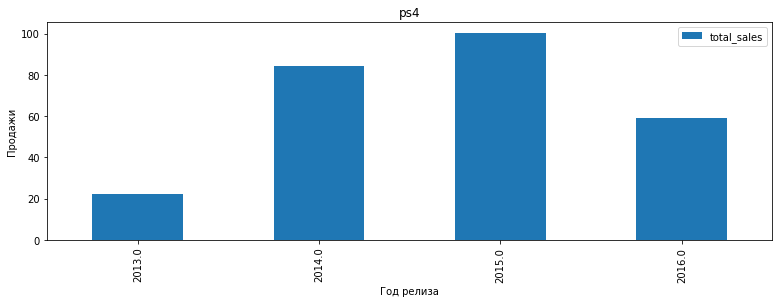

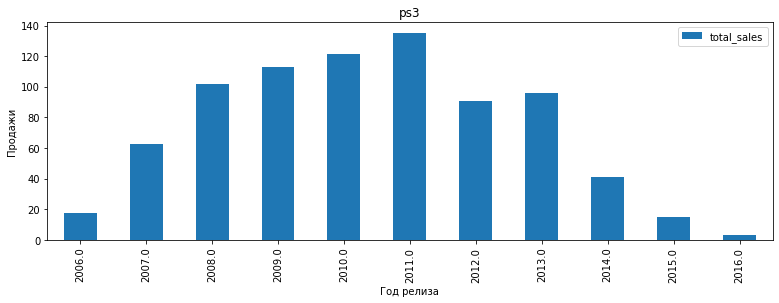

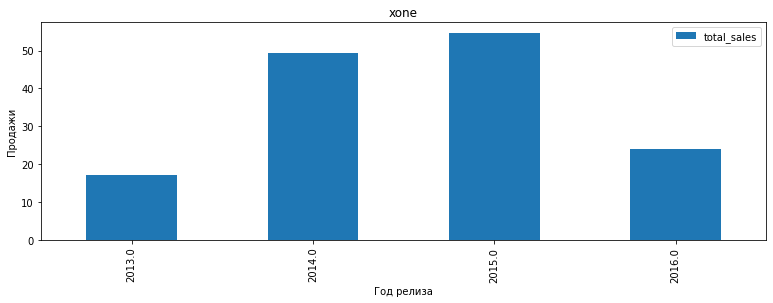

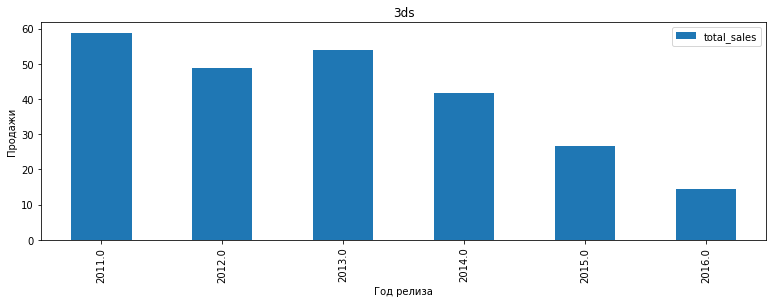

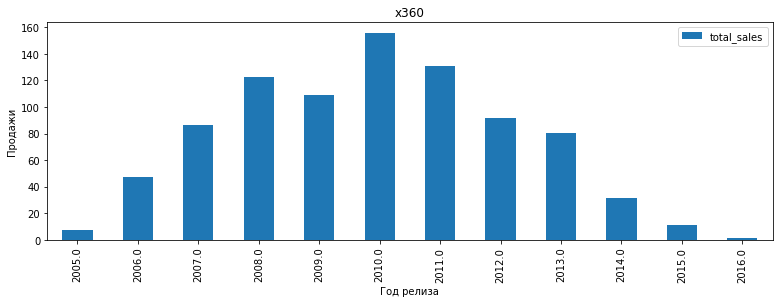

In [38]:
for p in platform_list:
    df[df['Platform'] == p].pivot_table(index = 'Year_of_Release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (13,4))
    plt.title(p)
    plt.xlabel('Год релиза')
    plt.ylabel('Продажи')

Исходя из графиков, можно сделать вывод, что средняя продолжительность жизни  платформы составляет ~8 лет.

Наиболее потенциально прибыльными платформами можно считать ps3 и xone

Основываясь на предыдущих анализах, можно выделить период:
   1. Резкий рост 200-х до 2004 и 2006-2008 (в 2005 был упадок)
   2. Пук в 2009 году
   3. После 2009 пошел спад

*5. Построим график «ящик с усами» по глобальным продажам игр в разбивке по наиболее потенциально прибыльным платформам*

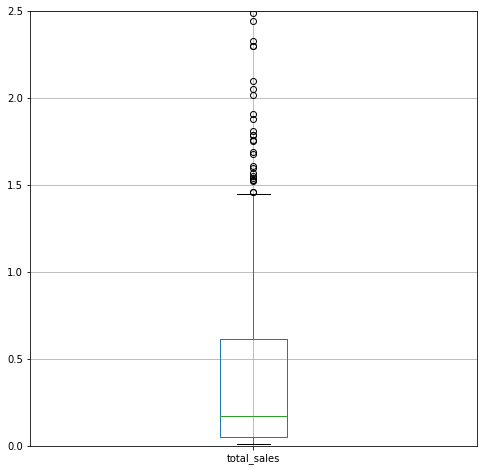

In [39]:
plot = df.loc[df['Platform'] == 'ps4'].boxplot('total_sales', figsize=(8, 8)).set_ylim(0, 2.5)

In [40]:
df.loc[df['Platform'] == 'ps4']['total_sales'].describe()

count    392.000000
mean       0.678036
std        1.355221
min        0.010000
25%        0.050000
50%        0.170000
75%        0.612500
max       12.250000
Name: total_sales, dtype: float64

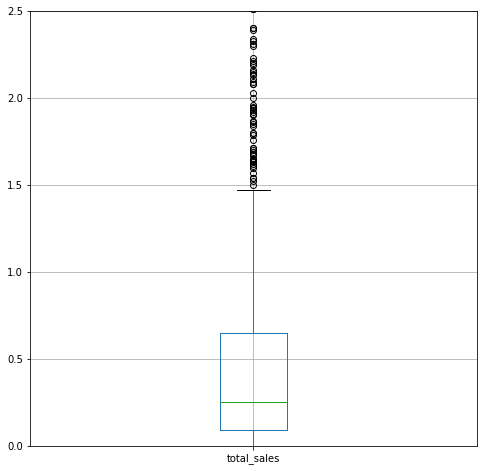

In [41]:
plot = df.loc[df['Platform'] == 'ps3'].boxplot('total_sales', figsize=(8, 8)).set_ylim(0, 2.5)

In [42]:
df.loc[df['Platform'] == 'ps3']['total_sales'].describe()

count    1331.000000
mean        0.604035
std         1.167133
min         0.000000
25%         0.090000
50%         0.250000
75%         0.650000
max        17.090000
Name: total_sales, dtype: float64

**Нижняя граница у платформы ps3 совпадает с нижнем квартилем (25%)**

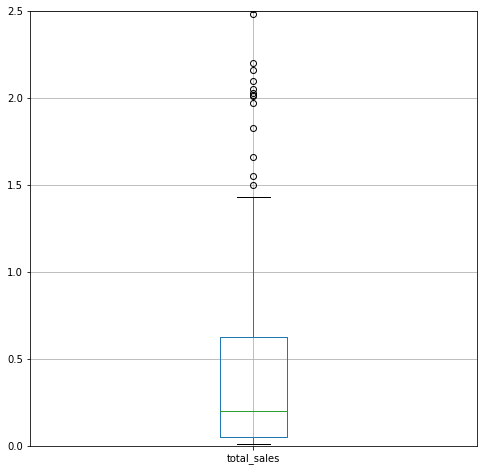

In [43]:
plot = df.loc[df['Platform'] == 'xone'].boxplot('total_sales', figsize=(8, 8)).set_ylim(0, 2.5)

In [44]:
df.loc[df['Platform'] == 'xone']['total_sales'].describe()

count    247.000000
mean       0.587247
std        0.942412
min        0.010000
25%        0.050000
50%        0.200000
75%        0.625000
max        6.710000
Name: total_sales, dtype: float64

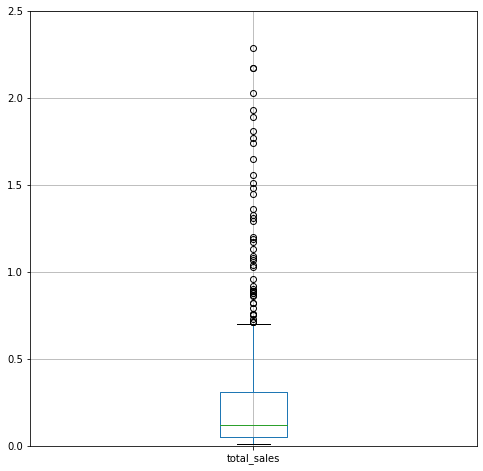

In [45]:
plot = df.loc[df['Platform'] == '3ds'].boxplot('total_sales', figsize=(8, 8)).set_ylim(0, 2.5)

In [46]:
df.loc[df['Platform'] == '3ds']['total_sales'].describe()

count    520.000000
mean       0.472385
std        1.346870
min        0.010000
25%        0.050000
50%        0.120000
75%        0.312500
max       13.820000
Name: total_sales, dtype: float64

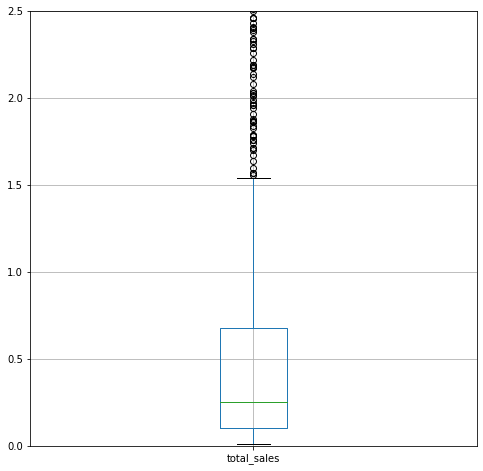

In [47]:
plot = df.loc[df['Platform'] == 'x360'].boxplot('total_sales', figsize=(8, 8)).set_ylim(0, 2.5)

In [48]:
df.loc[df['Platform'] == 'x360']['total_sales'].describe()

count    1262.000000
mean        0.701791
std         1.474027
min         0.010000
25%         0.100000
50%         0.250000
75%         0.680000
max        20.130000
Name: total_sales, dtype: float64

**Можно заметить, что есть много резких выбросов. У платформы ps3 гораздо больше выбросов, чем у платформы xone.**

**Выбросов у платформ ps4 и xone гораздо меньше, чем у других. Также у этих наиболее перспективных платформ одинакоые минимальные значения и 25% и очень похожие значения 50% и 75%.**

**Данные на всех диаграммах не симметричные**

**Ящик значений для платформы 3ds короче, чем у других платформ. Это значит, что продажи по этой платформе отличаются между союой меньше, чем на других платформах. Также 'усы' у него короче**

**Зеленые линии на графиках - медианы. Как и среднее значение, медиана является мерой положения центра распределения.**

**У платформы xone гораздо меньше выбросов по сравнению с другими платформами**

**Стандартное отклонение и максимальное значение у платформы ps3 больше, чем у плотформы xone**

*6. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами*

**Для ps3:**

array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='User_Score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='Critic_Score'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='Critic_Score'>,
        <AxesSubplot:xlabel='User_Score', ylabel='Critic_Score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='User_Score'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='User_Score'>,
        <AxesSubplot:xlabel='User_Score', ylabel='User_Score'>]],
      dtype=object)

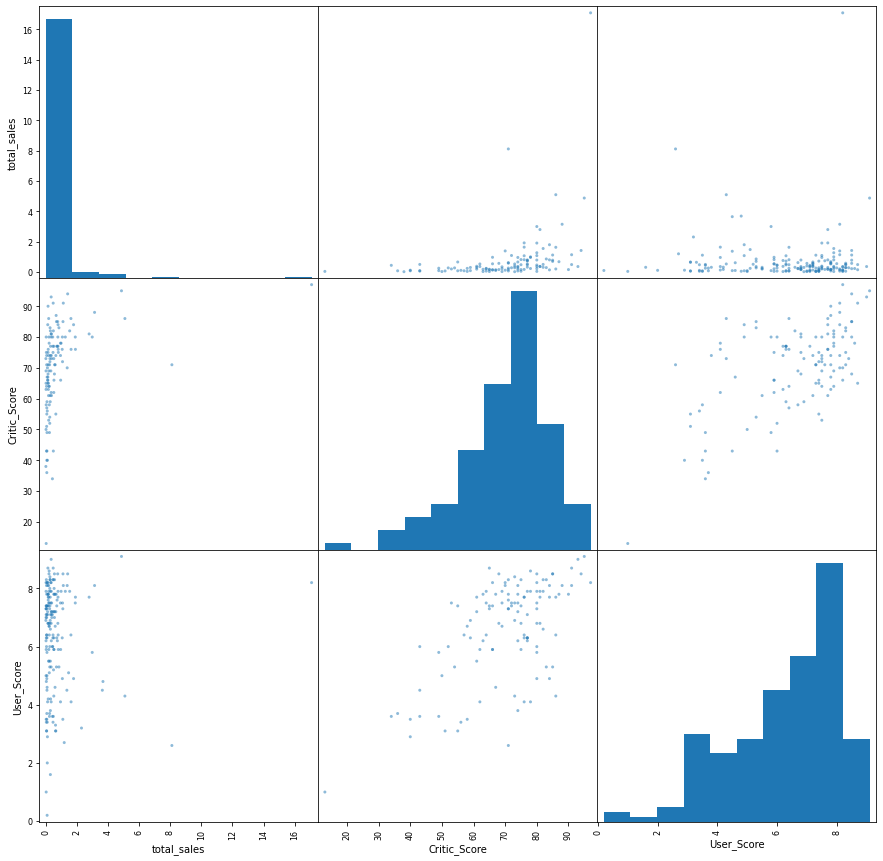

In [49]:
pd.plotting.scatter_matrix(df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "ps3"')[['total_sales','Critic_Score','User_Score']], figsize = (15,15))                                                                                                 

*Посчитаем коррелляцию:*

In [50]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "ps3"')['total_sales'].corr(df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "ps3"')['Critic_Score'])

0.3375139894933373

Связь положительная слабая

In [51]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "ps3"')['total_sales'].corr(df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "ps3"')['User_Score'])

0.0018991561369883425

Связи нет

**Для xone:**

array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='User_Score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='Critic_Score'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='Critic_Score'>,
        <AxesSubplot:xlabel='User_Score', ylabel='Critic_Score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='User_Score'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='User_Score'>,
        <AxesSubplot:xlabel='User_Score', ylabel='User_Score'>]],
      dtype=object)

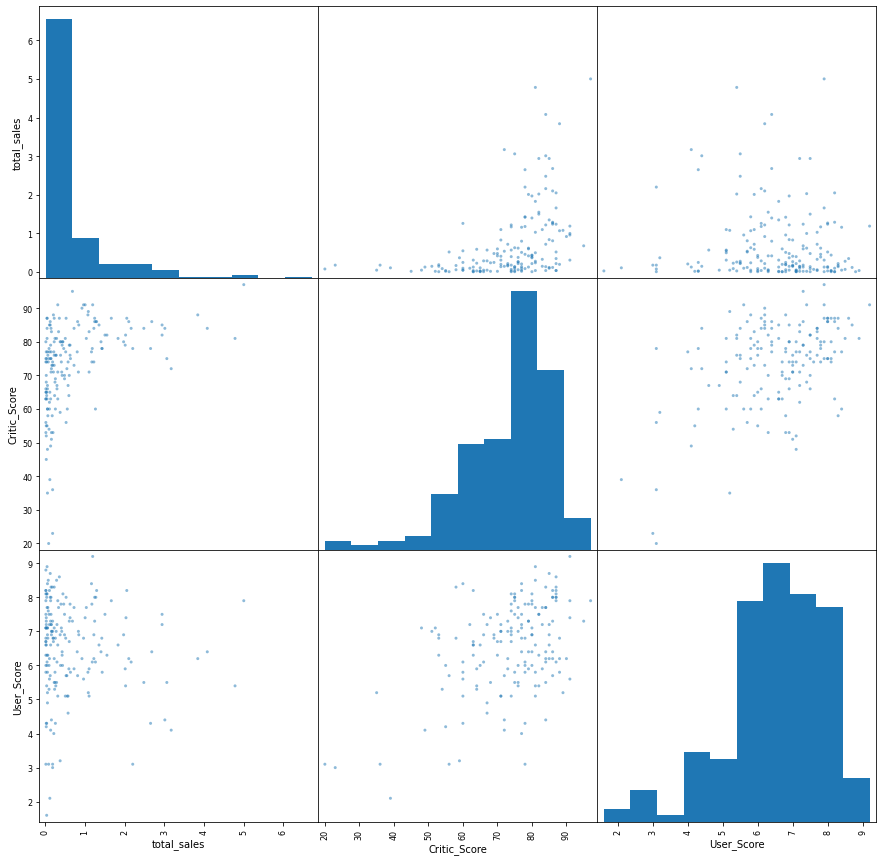

In [52]:
pd.plotting.scatter_matrix(df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "xone"')[['total_sales','Critic_Score','User_Score']], figsize = (15,15))
                                                                                                       

*Посчитаем коррелляцию:*

In [53]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "xone"')['total_sales'].corr(df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "xone"')['Critic_Score'])

0.41720638309101765

Есть положительный коэффицент коррелляции и связь между продажами и оценкой критиков. Возможно, это связано с тем, что пользователи охотнее купят игру, если знающие в этой свере критики высоко ее оценили

In [54]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "ps3"')['total_sales'].corr(df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "ps3"')['User_Score'])

0.0018991561369883425

Связи нет

Чем выше рейтинг, тем лучше продажи. Но по пользовательской оценки такой вывод сделать нельзя, так как есть игры, которые имеют хороший рейтиг, но мало продаж (и наоборот)

**Основываясь на значениях коррелляции можно сделать вывод, что при покупке игры покупатель не опирается на мнение других пользователей. На отзывы критиков он смотрит больше, но не намного, так как коррелляция все-таки довольно слабая**

*7. Посмотрим на общее распределение игр по жанрам. Выделяются ли жанры с высокими и низкими продажами?*

In [55]:
b = df.query('Year_of_Release in [2013, 2014, 2015, 2016]').groupby('Genre')['Genre'].count()
genres = b.index

Text(0.5, 1.0, 'Распределение игр по жанрам')

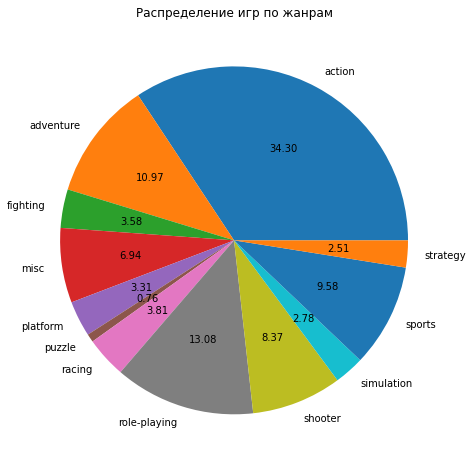

In [56]:
plt.figure(figsize = (20,8))
plt.pie(x = b, labels = genres, autopct = "%.2f")
plt.title('Распределение игр по жанрам')

Из круговой диаграммы видно, что самый популярный жанр - action (он занимает аж 34.3%)

Самые прибыльные жанры:

In [57]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Genre', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)

,total_sales
Genre,
action,284.67
shooter,204.21
role-playing,134.41
sports,131.20
misc,56.73
platform,38.51
racing,35.45
fighting,31.75
adventure,21.21


ТОП-3 самых прибыльных жанра:

In [58]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Genre', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head(3)

,total_sales
Genre,
action,284.67
shooter,204.21
role-playing,134.41


**Составим портрет пользователя каждого региона**

*Самые популярные платформы (топ-5):*

Продажи в Северной Америке:

In [59]:
a = df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Platform', values = 'NA_sales', aggfunc = 'sum').sort_values(by = 'NA_sales', ascending = False).head()
print(a)

          NA_sales
Platform          
ps4         108.74
xone         93.12
x360         81.66
ps3          63.50
3ds          38.20


Text(0, 0.5, 'Продажи')

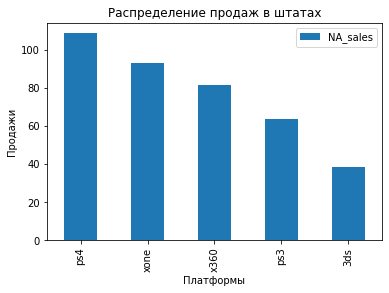

In [60]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Platform', values = 'NA_sales', aggfunc = 'sum').sort_values(by = 'NA_sales', ascending = False).head().plot(kind = 'bar')
plt.title('Распределение продаж в штатах')
plt.xlabel('Платформы')
plt.ylabel('Продажи')

Продажи в Европе:

In [61]:
b = df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Platform', values = 'EU_sales', aggfunc = 'sum').sort_values(by = 'EU_sales', ascending = False).head()
print(b)

          EU_sales
Platform          
ps4         141.09
ps3          67.81
xone         51.59
x360         42.52
3ds          30.96


Text(0, 0.5, 'Продажи')

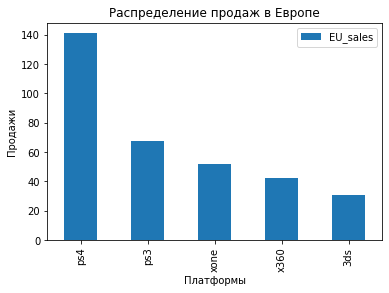

In [62]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Platform', values = 'EU_sales', aggfunc = 'sum').sort_values(by = 'EU_sales', ascending = False).head().plot(kind = 'bar')
plt.title('Распределение продаж в Европе')
plt.xlabel('Платформы')
plt.ylabel('Продажи')

Продажи в Японии:

In [63]:
c = df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Platform', values = 'JP_sales', aggfunc = 'sum').sort_values(by = 'JP_sales', ascending = False).head()
print(c)

          JP_sales
Platform          
3ds          67.81
ps3          23.35
psv          18.59
ps4          15.96
wiiu         10.88


Text(0, 0.5, 'Продажи')

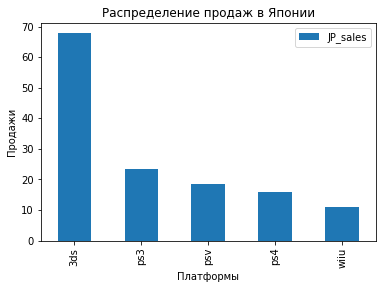

In [64]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Platform', values = 'JP_sales', aggfunc = 'sum').sort_values(by = 'JP_sales', ascending = False).head().plot(kind = 'bar')
plt.title('Распределение продаж в Японии')
plt.xlabel('Платформы')
plt.ylabel('Продажи')

Наибольшие продажи были в Северной Америке, наименьшии в Японии. Скорее всего, это связана с количеством людей, проживающих в этих регионах

Посчитаем соотношение продаж в разных регионах:

In [65]:
dolya = a['NA_sales']/b['EU_sales'] # Северной Америки к Европе
print(dolya)

Platform
3ds     1.233850
ps3     0.936440
ps4     0.770714
x360    1.920508
xone    1.805001
dtype: float64


**У пересекающихся платформ в Северной Америке продаж больше ~ в 1,5 - 2 раза по сравнению с Европой**

In [66]:
dolya = a['NA_sales']/c['JP_sales'] # Северной Америки к Японии
print(dolya)

Platform
3ds     0.563339
ps3     2.719486
ps4     6.813283
psv          NaN
wiiu         NaN
x360         NaN
xone         NaN
dtype: float64


**У Северной Америки по сравнению с Японией продаж гораздо больше**

In [67]:
dolya = b['EU_sales']/c['JP_sales'] # Европы к Японии
print(dolya)

Platform
3ds     0.456570
ps3     2.904069
ps4     8.840226
psv          NaN
wiiu         NaN
x360         NaN
xone         NaN
dtype: float64


**У Европы значительно больше продаж по платформам по сравнению с Японией**

*Самые популярные жанры:*

In [68]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Genre', values = 'NA_sales', aggfunc = 'sum').sort_values(by = 'NA_sales', ascending = False).head()

,NA_sales
Genre,
action,126.05
shooter,109.74
sports,65.27
role-playing,46.40
misc,27.49


Text(0, 0.5, 'Продажи')

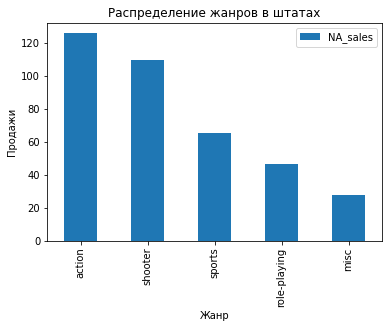

In [69]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Genre', values = 'NA_sales', aggfunc = 'sum').sort_values(by = 'NA_sales', ascending = False).head().plot(kind = 'bar')
plt.title('Распределение жанров в штатах')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

In [70]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Genre', values = 'EU_sales', aggfunc = 'sum').sort_values(by = 'EU_sales', ascending = False).head()

,EU_sales
Genre,
action,118.13
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19


Text(0, 0.5, 'Продажи')

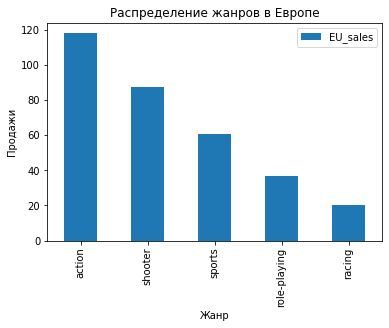

In [71]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Genre', values = 'EU_sales', aggfunc = 'sum').sort_values(by = 'EU_sales', ascending = False).head().plot(kind = 'bar')
plt.title('Распределение жанров в Европе')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

In [72]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Genre', values = 'JP_sales', aggfunc = 'sum').sort_values(by = 'JP_sales', ascending = False).head()

,JP_sales
Genre,
role-playing,51.04
action,40.49
misc,9.20
fighting,7.65
shooter,6.61


Text(0, 0.5, 'Продажи')

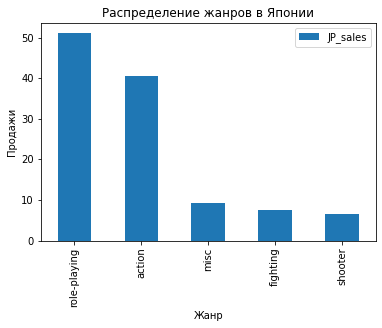

In [73]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Genre', values = 'JP_sales', aggfunc = 'sum').sort_values(by = 'JP_sales', ascending = False).head().plot(kind = 'bar')
plt.title('Распределение жанров в Японии')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

**В Северной Америке и Европе ТОП-4 жанров по популярности одинаковы. В Японии на 1-м месте в рейтинге популярности продаж находится жанр, который в Северной Америке и Европе имеет меньшую популярность. Это может быть связано с различием менталитетов и особенными вкусовыми предпочтениями нации. Также можно заметить, что в Японии преобладают с большим отрывом жанры role-playing и action**

*Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе*

Text(0, 0.5, 'Продажи')

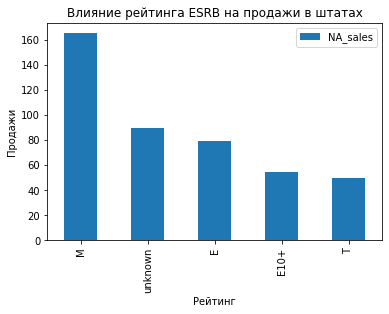

In [74]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Rating', values = 'NA_sales', aggfunc = 'sum').sort_values(by = 'NA_sales', ascending = False).head().plot(kind = 'bar')
plt.title('Влияние рейтинга ESRB на продажи в штатах')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

Text(0, 0.5, 'Продажи')

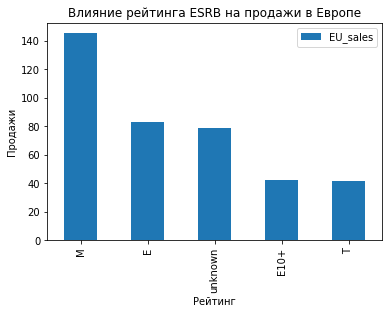

In [75]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Rating', values = 'EU_sales', aggfunc = 'sum').sort_values(by = 'EU_sales', ascending = False).head().plot(kind = 'bar')
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

Text(0, 0.5, 'Продажи')

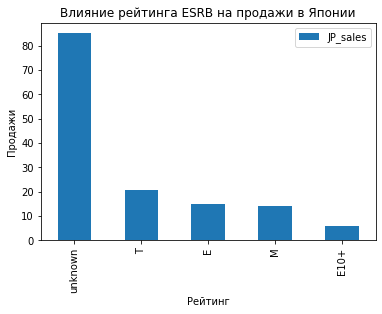

In [76]:
df.query('Year_of_Release in [2013, 2014, 2015, 2016]').pivot_table(index = 'Rating', values = 'JP_sales', aggfunc = 'sum').sort_values(by = 'JP_sales', ascending = False).head().plot(kind = 'bar')
plt.title('Влияние рейтинга ESRB на продажи в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

Да, влияние есть, это показано на графиках

**Исходя из графиков можно сделать вывод, что пользователи в Северной Америке и Европе в основном покупают игры, у которых указан рейтинг. А вот жители Японии на рейтинг не особо смотрят и охотно покупают игры без него. Причем доля игр, купленных без рейтинга, гораздо больше доль игр с рейтингами.**

**Вывод:**
   1. Пользователи штатов и Европы предпочитают боевики, а жители Японии ролевые игры
   2. В основном, игровые жанры для определенного региона соответствуют менталитету и культуре стран
   3. Некоторые платформы содержат несколько жанров, что позволяет покрыть потребности разных регионов
   4. Рейтинг ESRB влияет на игроков в штатах и Европе
   5. В Европе больше всего по сравнению с другими указанными регионами смотрят на рейтинг
   6. В Японии рейтинг не имеет значения и больше всего продано игр без указания рейтинга

**Проверим гипотезы:**

*1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

alpha = 5%

In [77]:
df['Genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

In [78]:
df['Platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Нулевая гипотеза - то, что требуется проверить по условию. Альтернативная - обратная нулевому условию. Это утверждение, которое принимается верным, если отбрасывается H₀. 

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые H0\
**Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC отличаются H1

Проверим, равны ли между собой дисперсии

In [79]:
xone = st.variation(df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "xone"')['User_Score'])
pc = st.variation(df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "pc"')['User_Score'])
print(xone*0.05<abs((xone-pc)))

False


Не равны

In [80]:
result = st.ttest_ind(df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "xone"')['User_Score'].dropna(),
                      df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Platform == "pc"')['User_Score'].dropna())
prob_first1 = result.pvalue
print('p-значения', prob_first1)
alpha = .05
if prob_first1 < alpha:
    print('Отвергаем нулевую гипотеза')
else:
    print('Не получилось отвергнуть нулевую гипотеза')

p-значения 0.14012658403611647
Не получилось отвергнуть нулевую гипотеза


**Вывод:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковы

*2. Средние пользовательские рейтинги жанров Action и Sports разные.*

alpha = 5%

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковые H0\
**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports разные H1

Проверим, равны ли между собой дисперсии

In [81]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,39.47
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


In [82]:
xone = st.variation(df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Genre == "action"')['User_Score'])
pc = st.variation(df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Genre == "sports"')['User_Score'])
print(xone*0.05<abs((xone-pc)))

False


Не равны

In [83]:
result = st.ttest_ind(df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Genre == "action"')['User_Score'].dropna(),
                      df.query('Year_of_Release in [2013, 2014, 2015, 2016] & Genre == "sports"')['User_Score'].dropna())
prob_first2 = result.pvalue
print('p-значения', prob_first2)
alpha = .05
if prob_first2 < alpha:
    print('Отвергаем нулевую гипотеза')
else:
    print('Не получилось отвергнуть нулевую гипотеза')

p-значения 1.0517832389140023e-27
Отвергаем нулевую гипотеза


**Вывод:** Средние пользовательские рейтинги жанров Action и Sports разные

**Общий вывод:**

Перед анализом данных мы подготовили данные
   1. Привели столбцы к правильным типам
   2. Привели названия к нижнему регистру
   3. Привели к правильным данным столбцы\
   
Далее определили, что TBD - to be determined, то есть данные были специально не заполнены. Заменили tbd на NaN.

В столбце Rating много пропусков и они не случайны, скорее всего эти игры не получили оценок, поскольку могли быть выпущены до того как появилась система ESRB или просто еще не успели их оценить. Заменили их на значение "unknown"

Проводя анализ поняли, что пик количества игр приходился на 2009 год.

Поняли, что средняя продолжительность "жизни" платформ составляет 8 лет.

Выявили наиболее популярные платформы: ps3 и xone.

У платформ-лидеров наблюдается взаимосвязь с количеством продаж и рейтингом критиков.

Проанализировали продажи и предпочтения по жанрам в разнах регионах мира. Поняли, что пользователи штатов и Европы предпочитают боевики, а жители Японии ролевые игры.

В ходе анализа проверили, что игровые жанры для определенного региона соответствуют менталитету и культуре стран.

Некоторые платформы содержат несколько жанров, что позволяет покрыть потребности разных регионов.

Рейтинг ESRB влияет на игроков. В Европе больше всего по сравнению с другими указанными регионами смотрят на рейтинг. В Японии рейтинг не имеет значения и больше всего продано игр без указания рейтинга
